Consider only the below columns and prepare a prediction model for predicting Price.

**Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")] **



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

In [4]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla (4).csv


In [7]:
df=pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')

In [8]:
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [9]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [12]:
df1 = pd.DataFrame({"Pr":df.Price, "Age":df.Age_08_04, "KM":df.KM, "HP":df.HP, "CC":df.cc, "Doors":df.Doors, "Gears":df.Gears, "QTax":df.Quarterly_Tax, "Wt":df.Weight})
df1

,Pr,Age,KM,HP,CC,Doors,Gears,QTax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pr      1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QTax    1436 non-null   int64
 8   Wt      1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [14]:
df1.isna().sum()#checking presence null values in columns

Pr       0
Age      0
KM       0
HP       0
CC       0
Doors    0
Gears    0
QTax     0
Wt       0
dtype: int64

In [15]:
df1[df1.duplicated()]

,Pr,Age,KM,HP,CC,Doors,Gears,QTax,Wt
113,24950,8,13253,116,2000,5,5,234,1320


In [16]:
df1=df1.drop_duplicates()

In [17]:
df1

,Pr,Age,KM,HP,CC,Doors,Gears,QTax,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [18]:
df1.corr()

,Pr,Age,KM,HP,CC,Doors,Gears,QTax,Wt
Pr,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Wt,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


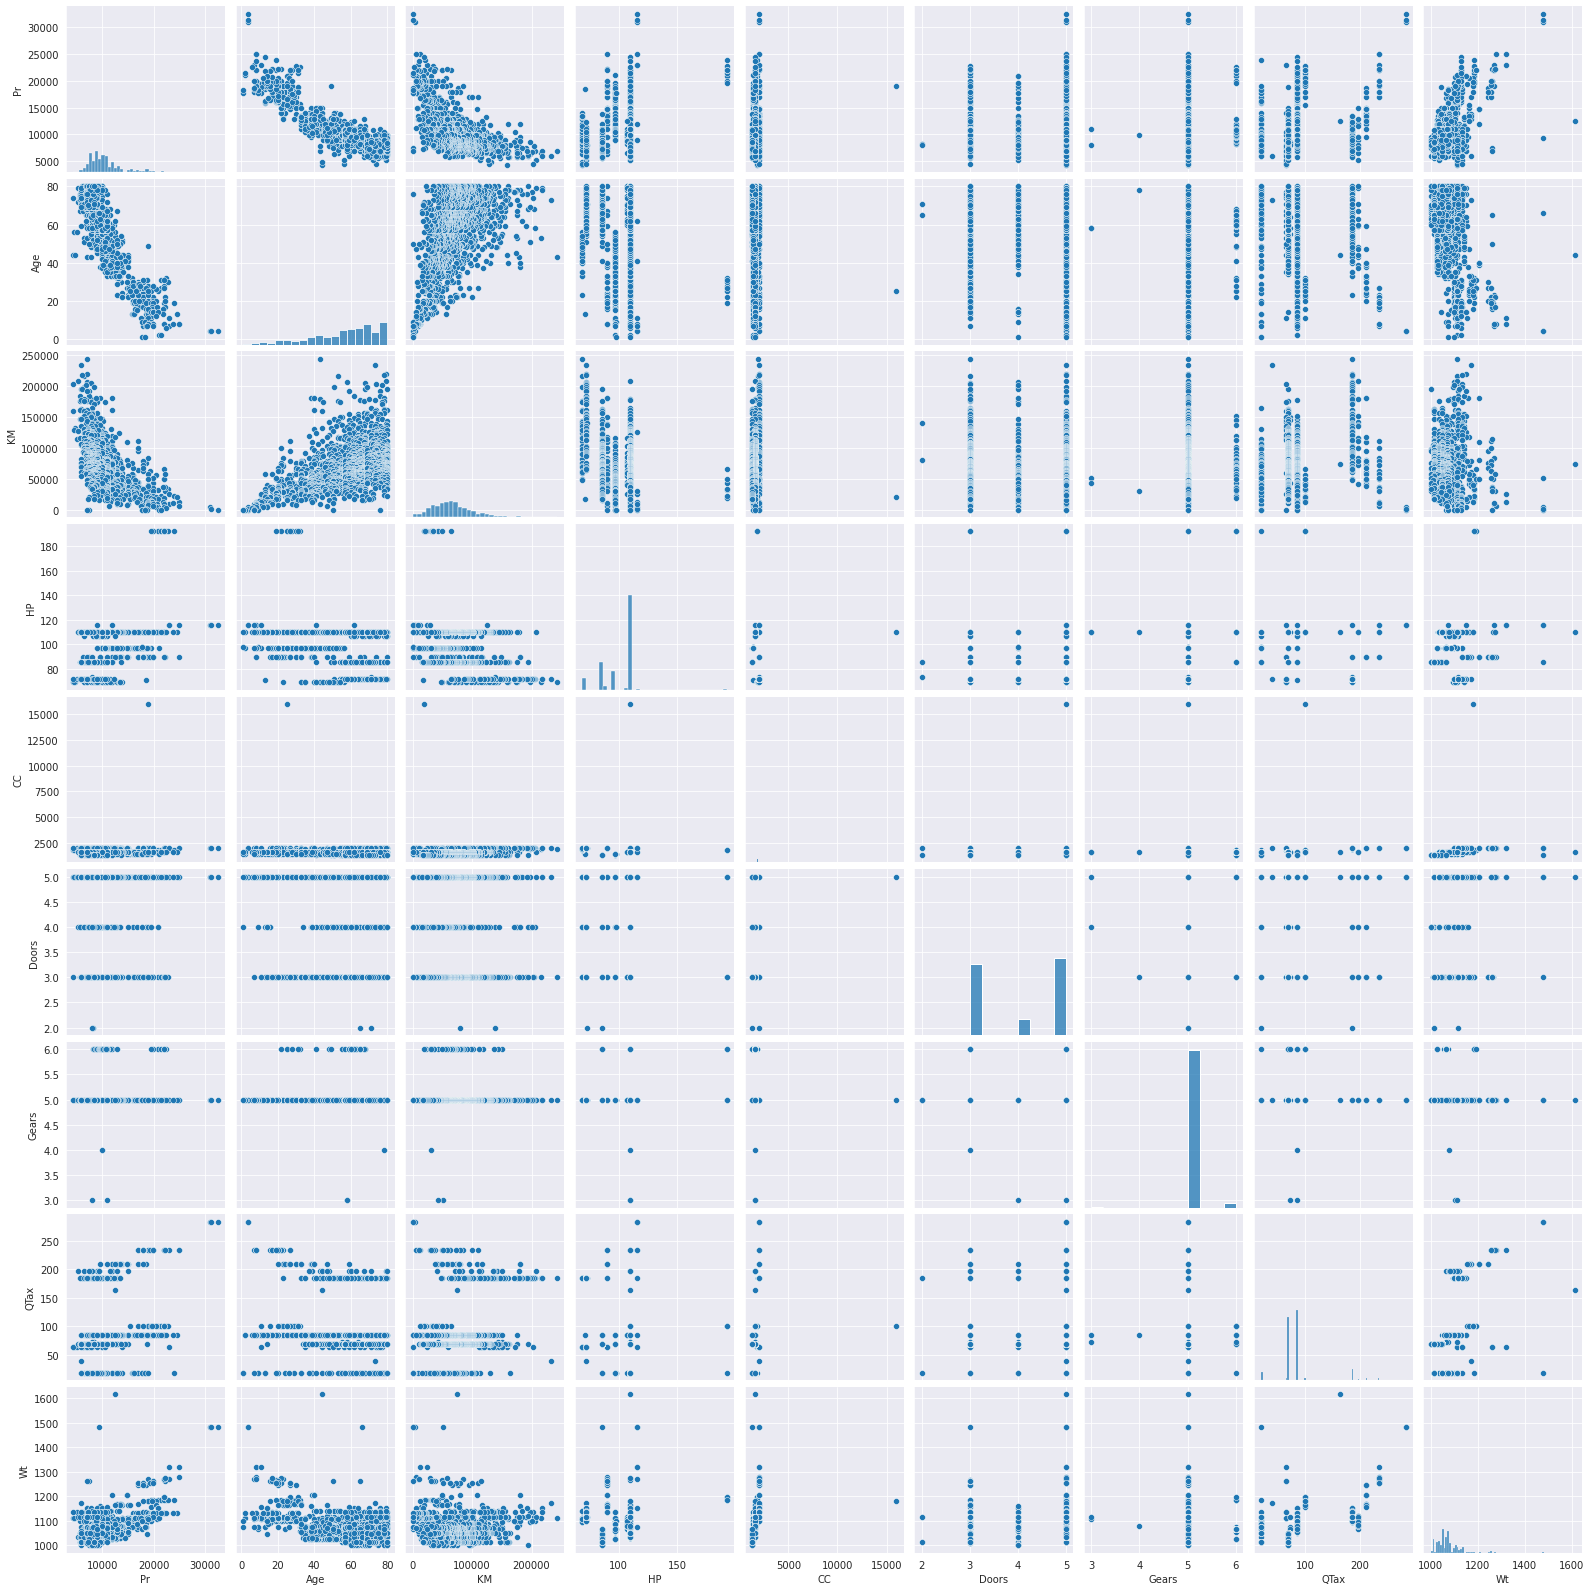

In [19]:
sns.set_style(style="darkgrid")
sns.pairplot(df1)

In [22]:
import statsmodels.formula.api as smf
model = smf.ols("Pr~Age+KM+HP+CC+Doors+Gears+QTax+Wt",data=df1).fit()

In [23]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QTax            3.858805
Wt             16.855470
dtype: float64

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Pr   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:32:25   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QTax           3.8588      1.311      2.944      0.003       1.288       6.430
Wt            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
rsquared_Age = smf.ols("Age~KM+HP+CC+Doors+Gears+QTax+Wt", data=df1).fit().rsquared
Vif_Age = 1/(1-rsquared_Age)

rsquared_KM = smf.ols("KM~Age+HP+CC+Doors+Gears+QTax+Wt", data=df1).fit().rsquared
Vif_KM = 1/(1-rsquared_KM)

rsquared_HP = smf.ols("HP~Age+KM+CC+Doors+Gears+QTax+Wt", data=df1).fit().rsquared
Vif_HP = 1/(1-rsquared_HP)

rsquared_CC = smf.ols("CC~Age+KM+HP+Doors+Gears+QTax+Wt", data=df1).fit().rsquared
Vif_CC = 1/(1-rsquared_CC)

rsquared_Doors = smf.ols("Doors~Age+KM+HP+CC+Gears+QTax+Wt", data=df1).fit().rsquared
Vif_Doors = 1/(1-rsquared_Doors)

rsquared_Gears = smf.ols("Gears~Age+KM+HP+CC+Doors+QTax+Wt", data=df1).fit().rsquared
Vif_Gears = 1/(1-rsquared_Gears)

rsquared_QuarterlyTax = smf.ols("QTax~Age+KM+HP+CC+Doors+Gears+Wt", data=df1).fit().rsquared
Vif_QTax = 1/(1-rsquared_QuarterlyTax)

rsquared_Weight = smf.ols("Wt~Age+KM+HP+CC+Doors+Gears+QTax", data=df1).fit().rsquared
Vif_Wt = 1/(1-rsquared_Weight)

Vif={"Features":["Age","KM","HP","CC","Doors","Gears","QTax","Wt"],"Vif_Values":[Vif_Age,Vif_KM,Vif_HP,Vif_CC,Vif_Doors,Vif_Gears,Vif_QTax,Vif_Wt]}
Vif_Frame = pd.DataFrame(Vif)
Vif_Frame

,Features,Vif_Values
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QTax,2.295375
7,Wt,2.487180


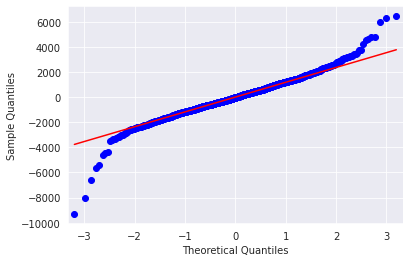

In [30]:
#Residual Analysis

import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line="q")

In [31]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [32]:
# Cooks Distance

model_influence = model.get_influence()
c,standard_distance = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


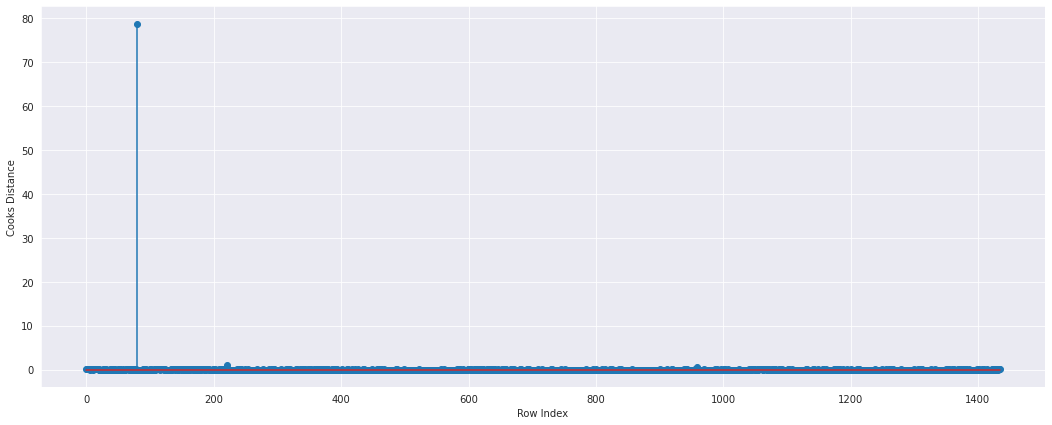

In [34]:
fig = plt.subplots(figsize=(18,7))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [35]:
np.argmax(c),np.max(c)

(80, 78.72950582258927)

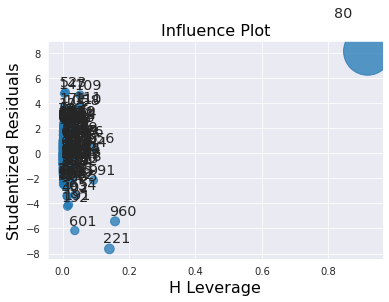

In [36]:
influence_plot(model)
plt.show()

In [37]:
k=df1.shape[1]
n=df1.shape[0]
levearge_cutoff = (3*(k+1))/n
levearge_cutoff

0.020905923344947737

In [38]:
df1[df1.index.isin([80])]

,Pr,Age,KM,HP,CC,Doors,Gears,QTax,Wt
80,18950,25,20019,110,16000,5,5,100,1180


In [39]:
df1=df1.drop(df.index[[80]]).reset_index(drop=True)
df1.shape

(1434, 9)

In [43]:
# Final Model

final_m1_v = smf.ols("Pr~Age+KM+HP+CC+Doors+Gears+QTax+Wt",data=df1).fit()
final_m1_v.rsquared,final_m1_v.aic

(0.8681163912634053, 24669.363894157)

In [44]:
final_m1_v.predict(df1)

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64